In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline
import seaborn as sns
import platform
from matplotlib import font_manager , rc

if platform.system() == 'Darwin':
  rc('font' , family = 'AppleGothic')
elif platform.system() == 'Windows':
  path = 'C:/Windows/Fonts/malgun.ttf'
  font_name = font_manager.FontProperties(fname = path).get_name()
  rc('font' , family = font_name)
else:
  print('모름')
plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score , precision_score , recall_score , roc_auc_score , f1_score , confusion_matrix , roc_curve , precision_recall_curve

In [2]:
data = pd.read_csv('diabetes.csv')
data.mean()

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

# Features
    - pregnancies : 임신 횟수
    - Glucose : 포도당 부자 검사 수치
    - BloodPressure : 혈압
    - SkinThickness : 팔 삼두근 위쪽 피하지방 측정값
    - Insulin : 혈청 인슐린
    - BMI : 체질량지수
    - DiabetesPedigreeFunction : 당뇨 내력 가중치
    - Age : 나이
    - Outcome : 클래스 결정값(target) , 0 or 1

In [3]:
data.iloc[:,-1].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [4]:
from sklearn.model_selection import train_test_split
train_input , test_input , train_target , test_target = train_test_split(data.iloc[:,:-1].to_numpy() , data.iloc[:,-1].to_numpy() , test_size = 0.2 , stratify = data.iloc[:,-1] , random_state = 42)

In [5]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)

StandardScaler()

In [6]:
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [7]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled , train_target)

LogisticRegression()

In [8]:
lr.score(train_scaled , train_target) , lr.score(test_scaled, test_target)

(0.7915309446254072, 0.7142857142857143)

In [9]:
pred = lr.predict(test_scaled)
pred_proba = lr.predict_proba(test_scaled)

In [10]:
confusion_matrix(test_target , pred)

array([[82, 18],
       [26, 28]], dtype=int64)

In [11]:
def get(real , pred = None , pred_proba = None):
    confusion = confusion_matrix(real , pred)
    accuracy = accuracy_score(real , pred)
    precision = precision_score(real , pred)
    recall = recall_score(real , pred)
    f1 = f1_score(real , pred)
    roc_auc = roc_auc_score(real , pred_proba)
    df = pd.DataFrame(confusion, index=['실제값(N)', '실제값(P)'], columns=['예측값(N)', '예측값(P)'])
    print('혼동 행렬\n {}'.format(df))
    print()
    print()
    print(f'정확도 : {accuracy:.4f} , 정밀도 : {precision:.4f} , 재현율 : {recall:.4f} , f1 스코어 : {f1:.4f} , roc곡선 : {roc_auc:.4f}')

In [12]:
get(test_target , pred , pred_proba[:,1])

혼동 행렬
         예측값(N)  예측값(P)
실제값(N)      82      18
실제값(P)      26      28


정확도 : 0.7143 , 정밀도 : 0.6087 , 재현율 : 0.5185 , f1 스코어 : 0.5600 , roc곡선 : 0.8230


- y가 0인 nagative가 많으므로 , 정확도보다 재현율에 초점을 맞춘다.

In [13]:
def prc(real , pred):
    precisions , recalls , thresholds = precision_recall_curve(real , pred)
    
    plt.figure(figsize = (10,10))
    boundary = thresholds.shape[0]
    plt.plot(thresholds , precisions[0:boundary] , ls= '--' , label = 'precision')
    plt.plot(thresholds , recalls[0:boundary] , label = 'recall')
    start , end = plt.xlim()
    plt.xticks(np.round(np.arange(start , end , 0.1) , 2))
    plt.xlabel('threshold value')
    plt.ylabel('precision and recall')
    plt.legend(loc = 'lower center')
    plt.grid()
    plt.show()

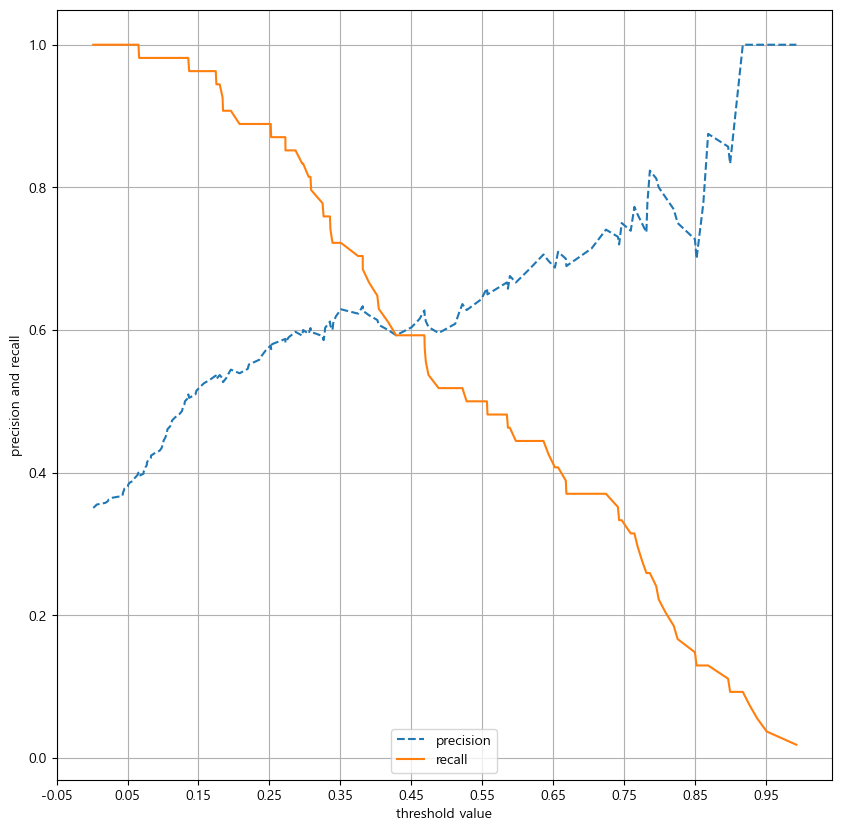

In [14]:
prc(test_target , pred_proba[:,1])

In [15]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [17]:
#최소값이 0인 경우가 많아서 , 0값의 건수와 전체 데이터의 건수 대비 비율 확인
zero_f = ['SkinThickness', 'Insulin']

In [18]:
total = len(data)
total

768

In [19]:
for i in zero_f:
    zero_count = (data[i] == 0).sum()
    print(f'{i} feature의 0의 건수는 {zero_count} 이고 , 비율은 {round(zero_count/total*100,4)}%이다.')

SkinThickness feature의 0의 건수는 227 이고 , 비율은 29.5573%이다.
Insulin feature의 0의 건수는 374 이고 , 비율은 48.6979%이다.


In [20]:
data = pd.read_csv('diabetes.csv')


In [21]:
# 데이터에서 0을 빼고 평균을 구하기
mean_ =data[zero_f][data[zero_f] != 0].mean()

In [22]:
# 그리고 결측치를 그 평균으로 대체
data[zero_f] = data[zero_f][data[zero_f] != 0].fillna(mean_)

In [23]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,29.153420,155.548223,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,8.790942,85.021108,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,25.000000,121.500000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.153420,155.548223,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [24]:
from sklearn.model_selection import train_test_split
train_input , test_input , train_target , test_target = train_test_split(data.iloc[:,:-1].to_numpy() , data.iloc[:,-1].to_numpy() , test_size = 0.2 , stratify = data.iloc[:,-1] , random_state = 156)

In [25]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)

StandardScaler()

In [26]:
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled , train_target)

LogisticRegression()

In [28]:
lr.score(train_scaled , train_target) , lr.score(test_scaled, test_target)

(0.7719869706840391, 0.7922077922077922)

In [29]:
pred = lr.predict(test_scaled)
pred_proba = lr.predict_proba(test_scaled)

In [30]:
def get(real , pred = None , pred_proba = None):
    confusion = confusion_matrix(real , pred)
    accuracy = accuracy_score(real , pred)
    precision = precision_score(real , pred)
    recall = recall_score(real , pred)
    f1 = f1_score(real , pred)
    roc_auc = roc_auc_score(real , pred_proba)
    df = pd.DataFrame(confusion, index=['실제값(N)', '실제값(P)'], columns=['예측값(N)', '예측값(P)'])
    print('혼동 행렬\n {}'.format(df))
    print()
    print()
    print(f'정확도 : {accuracy:.4f} , 정밀도 : {precision:.4f} , 재현율 : {recall:.4f} , f1 스코어 : {f1:.4f} , roc곡선 : {roc_auc:.4f}')

In [31]:
get(test_target , pred , pred_proba[:,1])

혼동 행렬
         예측값(N)  예측값(P)
실제값(N)      88      12
실제값(P)      20      34


정확도 : 0.7922 , 정밀도 : 0.7391 , 재현율 : 0.6296 , f1 스코어 : 0.6800 , roc곡선 : 0.8130


In [32]:
def prc(real , pred):
    precisions , recalls , thresholds = precision_recall_curve(real , pred)
    
    plt.figure(figsize = (10,10))
    boundary = thresholds.shape[0]
    plt.plot(thresholds , precisions[0:boundary] , ls= '--' , label = 'precision')
    plt.plot(thresholds , recalls[0:boundary] , label = 'recall')
    start , end = plt.xlim()
    plt.xticks(np.round(np.arange(start , end , 0.1) , 2))
    plt.xlabel('threshold value')
    plt.ylabel('precision and recall')
    plt.legend(loc = 'lower center')
    plt.grid()
    plt.show()

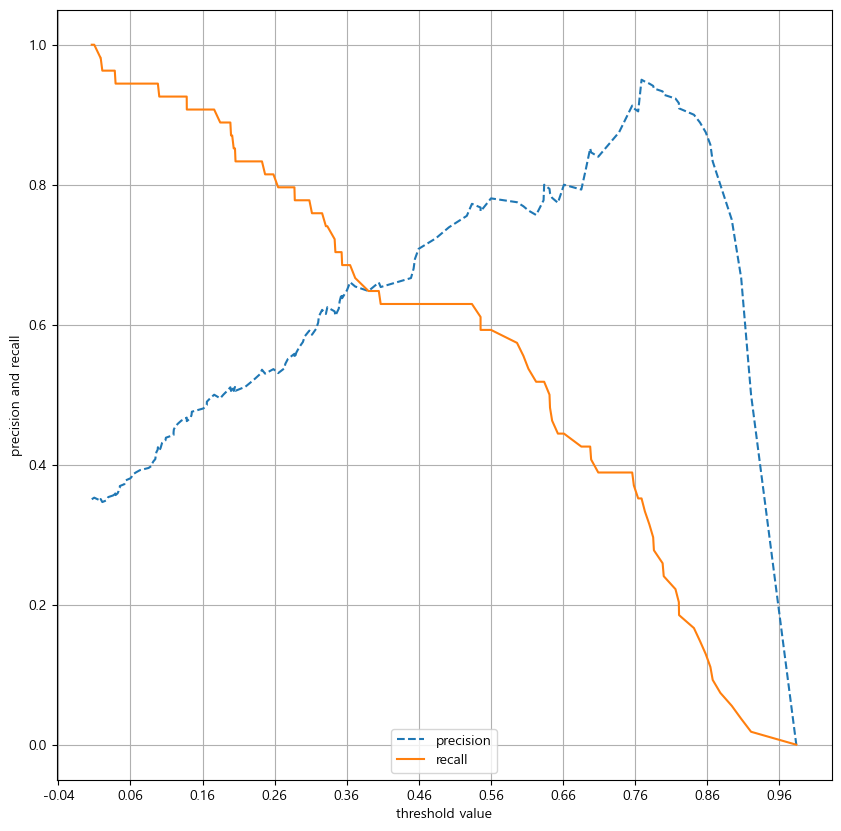

In [33]:
prc(test_target , pred_proba[:,1])

- f1 score가 높은 것에 초점을 맞춰보기

In [34]:
cut_off = [0.3,0.33,0.36,0.39,0.42,0.45,0.48,0.51]

for i in cut_off:
    #확률값이 cut보다 크면 1 , 아니면 0
    y_pred = np.where(pred_proba[:,1]>i , 1 , 0)
    acc = accuracy_score(test_target , y_pred)
    recall = recall_score(test_target , y_pred)
    precision = precision_score(test_target , y_pred)
    f1 = f1_score(test_target , y_pred)
    print(f'임계값 : {i}')
    print(f'정확도 : {acc:.2f}\n정밀도 : {precision:.2f}\n재현율 : {recall:.2f}\nf1스코어 : {f1:.2f}')
    print()
    print()

임계값 : 0.3
정확도 : 0.73
정밀도 : 0.58
재현율 : 0.78
f1스코어 : 0.67


임계값 : 0.33
정확도 : 0.75
정밀도 : 0.62
재현율 : 0.74
f1스코어 : 0.67


임계값 : 0.36
정확도 : 0.76
정밀도 : 0.65
재현율 : 0.69
f1스코어 : 0.67


임계값 : 0.39
정확도 : 0.75
정밀도 : 0.65
재현율 : 0.65
f1스코어 : 0.65


임계값 : 0.42
정확도 : 0.76
정밀도 : 0.67
재현율 : 0.63
f1스코어 : 0.65


임계값 : 0.45
정확도 : 0.77
정밀도 : 0.68
재현율 : 0.63
f1스코어 : 0.65


임계값 : 0.48
정확도 : 0.79
정밀도 : 0.72
재현율 : 0.63
f1스코어 : 0.67


임계값 : 0.51
정확도 : 0.80
정밀도 : 0.76
재현율 : 0.63
f1스코어 : 0.69




In [35]:
f1 = []
for i in range(1,96):
    y_pred = np.where(pred_proba[:,1]>i/100 , 1 , 0)
    f1.append(f1_score(test_target , y_pred))
    
max(f1)

0.6938775510204083

- f1 score가 가장 큰 임계값은 52번째에 있으므로 , 0.53일 때 , f1 score가 가장 높다.

In [36]:
from sklearn.preprocessing import Binarizer

In [37]:
def get_clf(y_test , pred , threshold , f1_show = False , auc_show = False):
    disp = pd.DataFrame()
    
    for thres in threshold:
        binarizer = Binarizer(threshold = thres)
        binarizer.fit(pred)
        thres_pred = binarizer.transform(pred)
        
        
        acc = accuracy_score(y_test , thres_pred)
        pre = precision_score(y_test , thres_pred)
        re = recall_score(y_test , thres_pred)
        f1 = f1_score(y_test , thres_pred)
        auc = roc_auc_score(y_test , thres_pred)
        
        
        eval_list = np.array([acc,pre,re,f1,auc]).reshape(-1,1)
        temp = pd.DataFrame(eval_list  , index = ['정확도','정밀도','재현율','f1스코어','auc'])
        disp = pd.concat([disp , temp] , axis = 1)
    
    disp.columns.names = ['임계값']
    
    if f1_show == False:
        disp.drop('f1스코어', axis = 0 , inplace = True)
    if auc_show == False:
        disp.drop('auc' , axis = 0 , inplace = True)
        
    disp.columns = [0.3,0.33,0.36,0.39,0.42,0.45,0.48,0.51]
    disp.columns.names = ['임계값']
    return round(disp , 4)

In [38]:
pred

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0],
      dtype=int64)

In [39]:
get_clf(test_target , pred_proba[:,1].reshape(-1,1) , cut_off , f1_show = True , auc_show = True)

임계값,0.30,0.33,0.36,0.39,0.42,0.45,0.48,0.51
정확도,0.7273,0.7468,0.7597,0.7532,0.7597,0.7662,0.7857,0.7987
정밀도,0.5833,0.6154,0.6491,0.6481,0.6667,0.6800,0.7234,0.7556
재현율,0.7778,0.7407,0.6852,0.6481,0.6296,0.6296,0.6296,0.6296
f1스코어,0.6667,0.6723,0.6667,0.6481,0.6476,0.6538,0.6733,0.6869
auc,0.7389,0.7454,0.7426,0.7291,0.7298,0.7348,0.7498,0.7598


In [40]:
get(test_target , pred , pred_proba[:,1])

혼동 행렬
         예측값(N)  예측값(P)
실제값(N)      88      12
실제값(P)      20      34


정확도 : 0.7922 , 정밀도 : 0.7391 , 재현율 : 0.6296 , f1 스코어 : 0.6800 , roc곡선 : 0.8130


In [41]:
pred

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0],
      dtype=int64)

In [42]:
get(test_target , pred , pred_proba[:,0])

혼동 행렬
         예측값(N)  예측값(P)
실제값(N)      88      12
실제값(P)      20      34


정확도 : 0.7922 , 정밀도 : 0.7391 , 재현율 : 0.6296 , f1 스코어 : 0.6800 , roc곡선 : 0.1870


In [47]:
lr = LogisticRegression()
lr.fit(train_scaled , train_target)

LogisticRegression()

In [48]:
fper , tper , thresholds = roc_curve(test_target , lr.predict(test_scaled))

In [50]:
roc_auc_score(test_target , lr.predict(test_scaled))

0.7548148148148149

In [52]:
thresholds

array([inf,  1.,  0.])

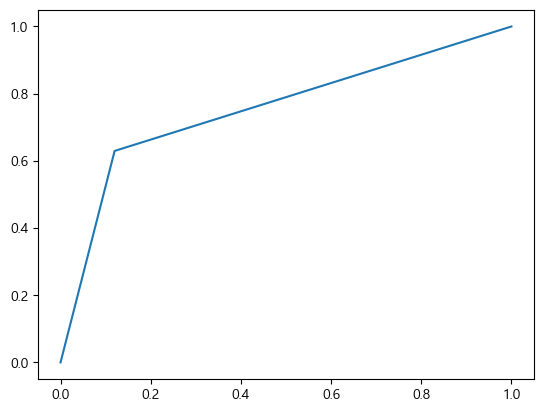

In [51]:
plt.plot(fper , tper)

In [54]:
pred_proba = lr.predict_proba(test_scaled)[:, 1]

# roc_curve 함수를 사용하여 FPR, TPR, thresholds를 얻음
fper, tper, thresholds = roc_curve(test_target, pred_proba)

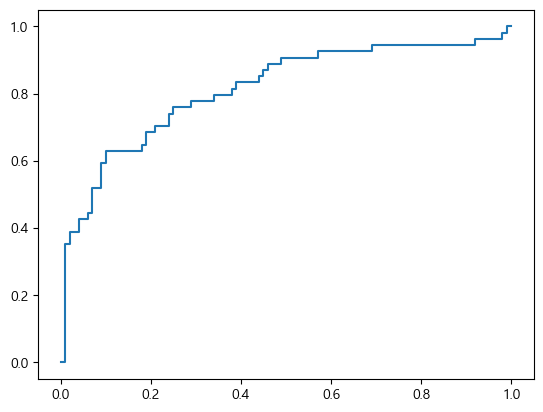

In [56]:
plt.plot(fper , tper)